<a href="https://colab.research.google.com/github/PrathibhaAngadi/Medicinal-Plant-Identification/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Medicinal_Leaf_dataset/Segmented_Medicinal_Leaf_Images")

In [ ]:
!ls

'Alpinia Galanga (Rasna)'		'Muntingia Calabura (Jamaica Cherry-Gasagase)'
'Amaranthus Viridis (Arive-Dantu)'	'Murraya Koenigii (Curry)'
'Artocarpus Heterophyllus (Jackfruit)'	'Nerium Oleander (Oleander)'
'Azadirachta Indica (Neem)'		'Nyctanthes Arbor-tristis (Parijata)'
'Basella Alba (Basale)'			'Ocimum Tenuiflorum (Tulsi)'
'Brassica Juncea (Indian Mustard)'	'Piper Betle (Betel)'
'Carissa Carandas (Karanda)'		'Plectranthus Amboinicus (Mexican Mint)'
'Citrus Limon (Lemon)'			'Pongamia Pinnata (Indian Beech)'
'Ficus Auriculata (Roxburgh fig)'	'Psidium Guajava (Guava)'
'Ficus Religiosa (Peepal Tree)'		'Punica Granatum (Pomegranate)'
'Hibiscus Rosa-sinensis'		'Santalum Album (Sandalwood)'
'Jasminum (Jasmine)'			'Syzygium Cumini (Jamun)'
'Mangifera Indica (Mango)'		'Syzygium Jambos (Rose Apple)'
'Mentha (Mint)'				'Tabernaemontana Divaricata (Crape Jasmine)'
'Moringa Oleifera (Drumstick)'		'Trigonella Foenum-graecum (Fenugreek)'


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [ ]:
print(os.getcwd())

/content/drive/MyDrive/Medicinal_Leaf_dataset/Segmented_Medicinal_Leaf_Images


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS=50

In [ ]:
dataset_path = "/content/drive/MyDrive/Medicinal_Leaf_dataset/Segmented_Medicinal_Leaf_Images"

# Create an image dataset from the directory
Medicinal_Leaf_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1835 files belonging to 30 classes.


In [ ]:
class_names = Medicinal_Leaf_dataset.class_names
class_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [ ]:
len(Medicinal_Leaf_dataset)

58

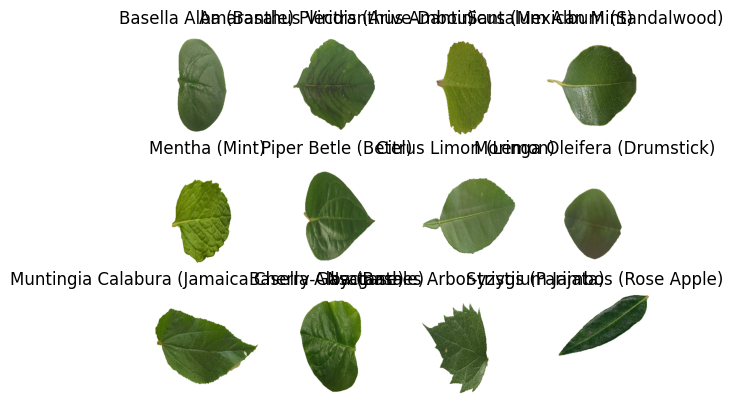

In [ ]:
for image_batch,label_batch in Medicinal_Leaf_dataset.take(1):
  for i in range(12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]])
     plt.axis("off")

In [ ]:
len(Medicinal_Leaf_dataset)

58

In [ ]:
train_size=0.8
len(Medicinal_Leaf_dataset)*train_size

46.400000000000006

In [ ]:
train_ds = Medicinal_Leaf_dataset.take(46)
len(train_ds)

46

In [ ]:
test_ds = Medicinal_Leaf_dataset.skip(46)
len(test_ds)

12

In [ ]:
val_size=0.1
len(Medicinal_Leaf_dataset)*val_size

5.800000000000001

In [ ]:
val_ds = test_ds.take(5)
len(val_ds)

5

In [ ]:
test_ds = test_ds.skip(5)
len(test_ds)


7

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(Medicinal_Leaf_dataset)

In [ ]:
len(train_ds)

46

In [ ]:
len(val_ds)

5

In [ ]:
len(test_ds)

7

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 30

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 30)                    │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,502 (724.62 KB)

 Trainable params: 185,502 (724.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 475s 5s/step - accuracy: 0.0509 - loss: 3.3952 - val_accuracy: 0.1375 - val_loss: 3.2254
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.0844 - loss: 3.2400 - val_accuracy: 0.1813 - val_loss: 2.9834
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.1326 - loss: 2.8907 - val_accuracy: 0.2000 - val_loss: 2.6891
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.2076 - loss: 2.6617 - val_accuracy: 0.2625 - val_loss: 2.3358
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.2543 - loss: 2.3253 - val_accuracy: 0.3500 - val_loss: 2.1990
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.3210 - loss: 2.1502 - val_accuracy: 0.3500 - val_loss: 2.0679
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.3413 - loss: 2.0522 - val_accuracy: 0.3313 - val_loss: 2.0162
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.3710 - loss: 2.0140 - val_accuracy: 0.4062 - v

In [ ]:
scores=model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8418 - loss: 0.5407


In [ ]:
scores

[0.5918936729431152, 0.8035714030265808]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 46}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[3.372607946395874,
 3.1507389545440674,
 2.8394839763641357,
 2.582268238067627,
 2.310460090637207]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

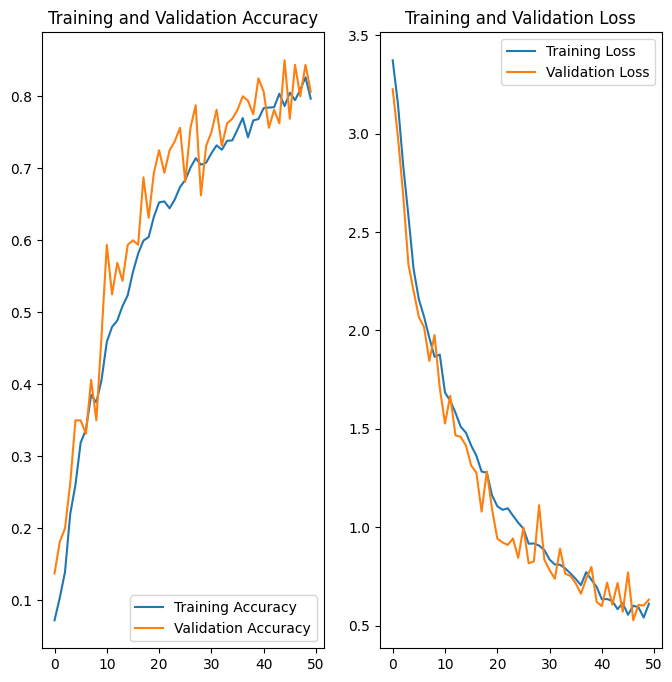

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Ocimum Tenuiflorum (Tulsi)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: Ocimum Tenuiflorum (Tulsi)


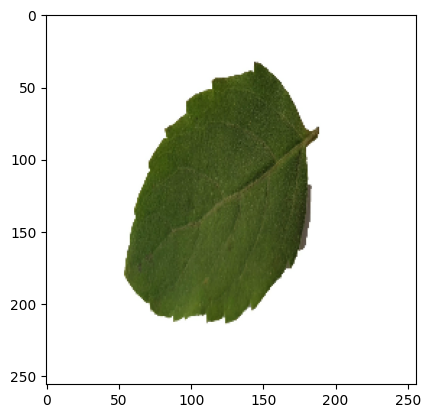

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


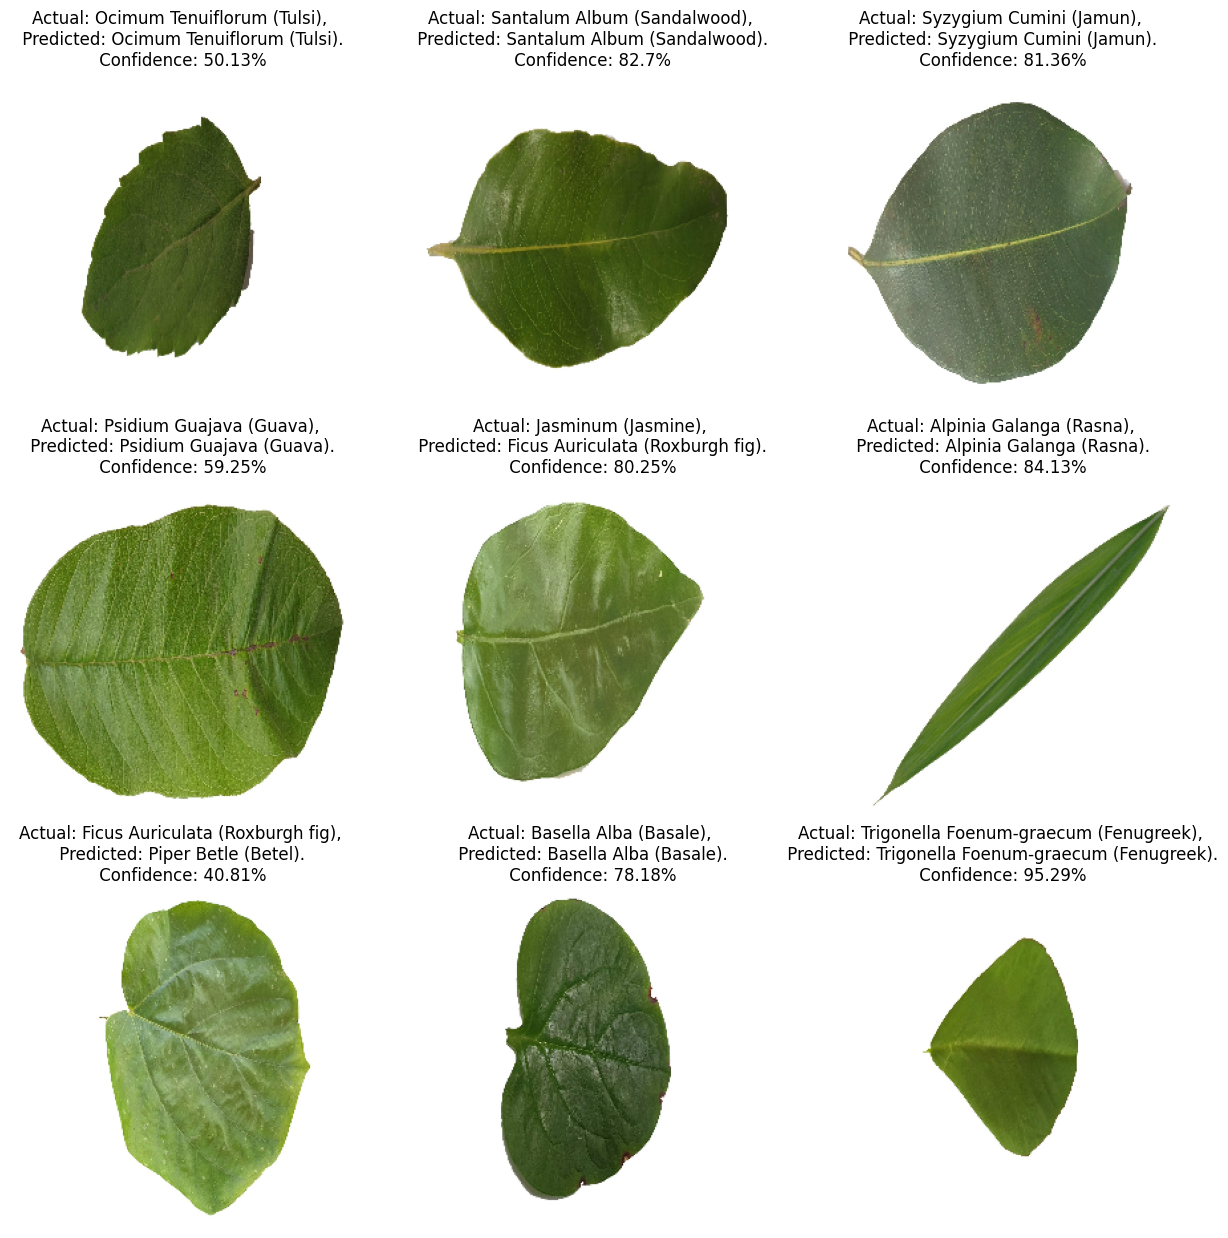

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
from google.colab import drive
import tensorflow as tf

# Mount Google Drive
#drive.mount('/content/drive')

# Define your model (example)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model (example)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Save the model as a directory
model_version = 1
model_save_path = f"/content/drive/My Drive/models/model_v{model_version}.keras"
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")



Model saved to: /content/drive/My Drive/models/model_v1.keras
